## Strandard Import

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 8

from scipy.stats import norm
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

## Explore Data

In [2]:
data_ks_train = pd.read_csv('KS_train_data.csv', delimiter= ',')
data_ks_test = pd.read_csv('KS_test_data.csv', delimiter= ';')

### Describe Data

In [3]:
data_ks_train.describe()

,backers_count,converted_pledged_amount,created_at,deadline,fx_rate,goal,launched_at,pledged,usd_pledged
count,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05
mean,151.089430,1.241108e+04,1.400524e+09,1.406896e+09,1.017654,4.447512e+04,1.403972e+09,1.312485e+04,1.241284e+04
std,1163.024964,1.005545e+05,6.334581e+07,6.340574e+07,0.169773,1.256033e+06,6.360489e+07,1.080345e+05,1.005368e+05
min,0.000000,0.000000e+00,1.240366e+09,1.243556e+09,0.009337,1.000000e-02,1.240674e+09,0.000000e+00,0.000000e+00
25%,4.000000,1.250000e+02,1.349203e+09,1.357171e+09,1.000000,1.500000e+03,1.354313e+09,1.250000e+02,1.250000e+02
50%,28.000000,1.650000e+03,1.408426e+09,1.415244e+09,1.000000,5.000000e+03,1.412373e+09,1.635500e+03,1.651000e+03
75%,86.000000,6.271250e+03,1.447206e+09,1.454243e+09,1.000000,1.200000e+04,1.451252e+09,6.310000e+03,6.275042e+03
max,105857.000000,1.026684e+07,1.517539e+09,1.518702e+09,1.401112,1.000000e+08,1.518037e+09,1.026685e+07,1.026685e+07


### Data Process

[goal] => USD_goal

In [4]:
df_ks = data_ks_train
df_ks['usd_goal'] = df_ks['goal'] * df_ks['fx_rate']
df_ks.describe()

,backers_count,converted_pledged_amount,created_at,deadline,fx_rate,goal,launched_at,pledged,usd_pledged,usd_goal
count,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05
mean,151.089430,1.241108e+04,1.400524e+09,1.406896e+09,1.017654,4.447512e+04,1.403972e+09,1.312485e+04,1.241284e+04,4.052436e+04
std,1163.024964,1.005545e+05,6.334581e+07,6.340574e+07,0.169773,1.256033e+06,6.360489e+07,1.080345e+05,1.005368e+05,1.191352e+06
min,0.000000,0.000000e+00,1.240366e+09,1.243556e+09,0.009337,1.000000e-02,1.240674e+09,0.000000e+00,0.000000e+00,1.000000e-02
25%,4.000000,1.250000e+02,1.349203e+09,1.357171e+09,1.000000,1.500000e+03,1.354313e+09,1.250000e+02,1.250000e+02,1.500000e+03
50%,28.000000,1.650000e+03,1.408426e+09,1.415244e+09,1.000000,5.000000e+03,1.412373e+09,1.635500e+03,1.651000e+03,5.000000e+03
75%,86.000000,6.271250e+03,1.447206e+09,1.454243e+09,1.000000,1.200000e+04,1.451252e+09,6.310000e+03,6.275042e+03,1.200000e+04
max,105857.000000,1.026684e+07,1.517539e+09,1.518702e+09,1.401112,1.000000e+08,1.518037e+09,1.026685e+07,1.026685e+07,1.401112e+08


### **Calculate Percentage of success**

In [5]:
df_ks['pt_success'] = df_ks['usd_pledged'] / df_ks['usd_goal']
df_ks['pt_success'].describe()


count    100000.000000
mean          3.282139
std         165.490788
min           0.000000
25%           0.028995
50%           1.017750
75%           1.232006
max       41535.010000
Name: pt_success, dtype: float64

**对threshold的选择**
```
> 5 : 3000+
> 10: 1700+
```

In [6]:
outliers = df_ks.index[df_ks['pt_success'] > 5]
outliers

Int64Index([    7,    70,    97,   100,   145,   170,   181,   252,   253,
              274,
            ...
            98397, 98740, 98762, 98803, 98806, 98956, 98959, 99095, 99472,
            99990],
           dtype='int64', length=3189)

**Typical Extreme case**

```
index = 54553
goal = 1
pledged = 41535
category = game
```

**Kill outliers**

In [7]:
df_ks.drop(outliers, inplace=True)

**check new data**

In [8]:
df_ks['pt_success'].describe()

count    96811.000000
mean         0.847285
std          0.846888
min          0.000000
25%          0.024325
50%          1.012000
75%          1.194131
max          5.000000
Name: pt_success, dtype: float64

**We tried to log化 success rate， but the result is not very pleasantable**

In [9]:

# df_ks['lgpt_success'] = np.log(df_ks['pt_success'])
# df_ks['lgpt_success'].describe()

count    1.000000e+05
mean             -inf
std               NaN
min              -inf
25%     -3.540616e+00
50%      1.759431e-02
75%      2.086440e-01
max      1.063429e+01
Name: lgpt_success, dtype: float64

### **Calculate Promotion Duration**

In [9]:
duration = pd.to_datetime(df_ks['deadline'], unit='s') - pd.to_datetime(df_ks['launched_at'], unit='s')

In [10]:
# transtate the yyyy-mm-dd format to int
df_ks['promotion_duration'] = duration / np.timedelta64(1, 'D')
df_ks['promotion_duration'].describe()

count    96811.000000
mean        33.925830
std         12.970054
min          1.000000
25%         30.000000
50%         30.000000
75%         36.070608
max         91.958333
Name: promotion_duration, dtype: float64

### **Explore other features**

#### **Category**

<AxesSubplot:xlabel='pt_success', ylabel='category'>

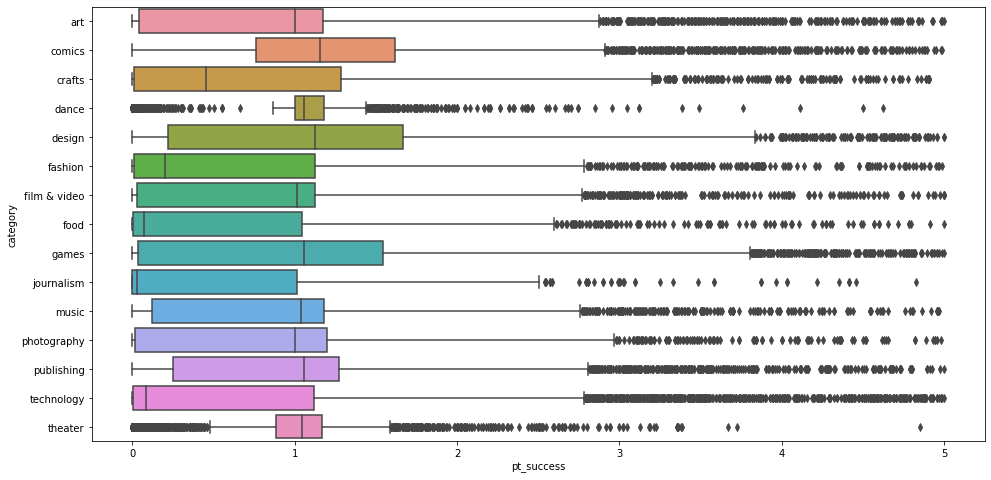

In [11]:
sns.boxplot(df_ks['pt_success'], df_ks['category'])

### **Country**

In [13]:
df_ks['country'].describe()

count     96808
unique      174
top          US
freq      74221
Name: country, dtype: object

**Top 10 countries**

In [ ]:
n = 10
top_10 = df_ks['country'].value_counts()[:n].index

In [16]:
print(top_10)

Index(['US', 'GB', 'CA', 'AU', 'DE', 'FR', '?', 'NL', 'IT', 'ES'], dtype='object')


**Select top 10 countries records**

In [20]:
tops = df_ks.loc[df_ks['country'].isin(top_10)]

In [ ]:
print(tops)

**Boxplot**

<AxesSubplot:xlabel='pt_success', ylabel='country'>

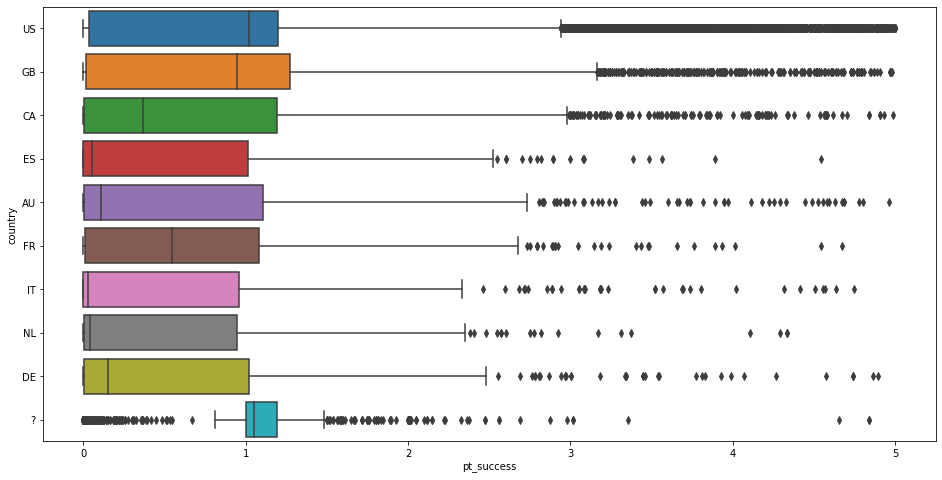

In [23]:
sns.boxplot(tops['pt_success'], tops['country'])

### **HeatMap**

**Clear invalid data**

In [26]:
hm_features = ['backers_count', 'converted_pledged_amount', 'pt_success', 'promotion_duration','usd_goal', 'staff_pick']
nulls = df_ks[hm_features].isnull().sum()
print(nulls)

backers_count               0
converted_pledged_amount    0
pt_success                  0
promotion_duration          0
usd_goal                    0
staff_pick                  0
dtype: int64


<AxesSubplot:>

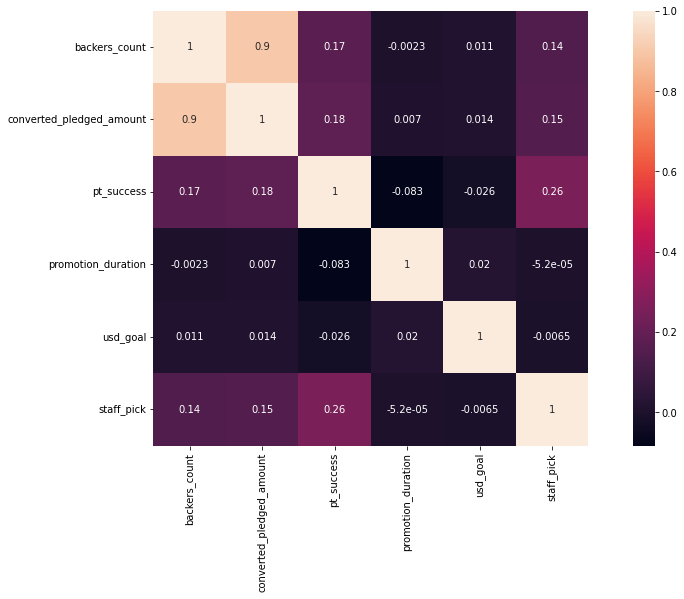

In [27]:
corrmat_all = df_ks[hm_features].corr()
sns.heatmap(corrmat_all,square=True, annot=True)

## Text Feature
Test using TF-IDF to convert text feature into numerical features.

Print blurb information

In [ ]:
print(data_ks_train.blurb[15])
print(data_ks_train.funded[15])

Convert `funded` into `0` and `1`

**转化之后反而没有办法来fit model了！！！**

In [ ]:

# data_ks_prep.loc[data_ks_prep.funded == True, 'funded'] = 1
# data_ks_prep.loc[data_ks_prep.funded == False, 'funded'] = 0

In [ ]:
print('invalid funded entries:', data_ks_prep.funded.isnull().sum())

**Test if funded are converted**

In [ ]:
print(data_ks_prep.funded[15])

### 预处理Blurb


**用空格替换NaN数据**

In [ ]:
#好像不起作用

# data_ks_prep.loc[data_ks_prep.blurb.isnull(), 'funded'] = ' '
# print('invalid Blurb entries:', data_ks_prep.blurb.isnull().sum())
# print(data_ks_prep.loc[data_ks_prep['blurb'].isnull()])

### 对文本进行分词
构建特征字典，将文档转换成特征向量

In [ ]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(data_ks_prep.blurb.values.astype('U'))
X_train_counts.shape

**构建N-gram模型字典**

In [ ]:
count_vect.vocabulary_.get(u'algorithm')

**根据词频算法重构**

In [ ]:
tf_vec = TfidfVectorizer()
X_train_tf = tf_vec.fit_transform(data_ks_prep.blurb.values.astype('U'))
X_train_tf.shape

In [ ]:

# blurbs = data_ks_train['blurb']
# vec = TfidfVectorizer()
# X = vec.fit_transform(blurbs.values.astype('U'))
# pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

#names = data_ks_train['name']
#vec = TfidfVectorizer()
#X2 = vec.fit_transform(names.values.astype('U'))
#pd.DataFrame(X2.toarray(), columns=vec.get_feature_names())


## 拆分为Train Dataset 和 Test Dataset

In [ ]:
features = ['','']
X = data_ks_prep[features]
y = data_ks_prep['funded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## 尝试使用贝叶斯来分类

前期准备

In [ ]:
# from sklearn.naive_bayes import MultinomialNB
# clf = MultinomialNB().fit(X_train_tf,data_ks_prep.funded)

## KNN Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

### Predict test target

In [ ]:
y_pred = knn.predict(X_test)

## Evaluate

In [ ]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))